<a href="https://colab.research.google.com/github/SumitNikhade/Machine-learning/blob/main/Analysing_Air_Quality_Index_(AQI)_in_city.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("data.csv")

In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [ ]:

df.isnull().sum()

,0
stn_code,15764
sampling_date,0
state,0
location,0
agency,16355
type,994
so2,1313
no2,858
rspm,2696
spm,28659


In [ ]:
df.describe()

,stn_code,so2,no2,rspm,spm,pm2_5
count,33241.000000,47692.000000,48147.000000,46309.000000,20346.000000,0.0
mean,472.235282,7.584295,19.590108,86.223710,194.472407,NaN
std,182.251423,6.929109,11.634060,50.249801,109.861054,NaN
min,44.000000,0.400000,0.500000,2.000000,0.000000,NaN
25%,371.000000,4.800000,12.500000,53.000000,120.000000,NaN
50%,537.000000,6.000000,16.000000,76.000000,175.000000,NaN
75%,587.000000,8.000000,24.000000,106.000000,249.000000,NaN
max,788.000000,228.000000,334.900000,790.000000,1752.000000,NaN


In [ ]:
print(df.describe())

           stn_code           so2           no2          rspm           spm  \
count  33241.000000  47692.000000  48147.000000  46309.000000  20346.000000   
mean     472.235282      7.584295     19.590108     86.223710    194.472407   
std      182.251423      6.929109     11.634060     50.249801    109.861054   
min       44.000000      0.400000      0.500000      2.000000      0.000000   
25%      371.000000      4.800000     12.500000     53.000000    120.000000   
50%      537.000000      6.000000     16.000000     76.000000    175.000000   
75%      587.000000      8.000000     24.000000    106.000000    249.000000   
max      788.000000    228.000000    334.900000    790.000000   1752.000000   

       pm2_5  
count    0.0  
mean     NaN  
std      NaN  
min      NaN  
25%      NaN  
50%      NaN  
75%      NaN  
max      NaN  


In [ ]:
df.shape

(49005, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49005 entries, 0 to 49004
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     33241 non-null  float64
 1   sampling_date                49005 non-null  object 
 2   state                        49005 non-null  object 
 3   location                     49005 non-null  object 
 4   agency                       32650 non-null  object 
 5   type                         48011 non-null  object 
 6   so2                          47692 non-null  float64
 7   no2                          48147 non-null  float64
 8   rspm                         46309 non-null  float64
 9   spm                          20346 non-null  float64
 10  location_monitoring_station  46468 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         49005 non-null  object 
dtypes: float64(6), o

In [ ]:

df.isnull()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,False,False,False,False,True,False,False,False,True,True,True,True,False
1,False,False,False,False,True,False,False,False,True,True,True,True,False
2,False,False,False,False,True,False,False,False,True,True,True,True,False
3,False,False,False,False,True,False,False,False,True,True,True,True,False
4,False,False,False,False,True,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49000,True,False,False,False,True,False,False,False,False,False,False,True,False
49001,True,False,False,False,True,False,True,False,False,False,False,True,False
49002,True,False,False,False,True,False,True,False,False,False,False,True,False
49003,True,False,False,False,True,False,True,False,False,False,False,True,False


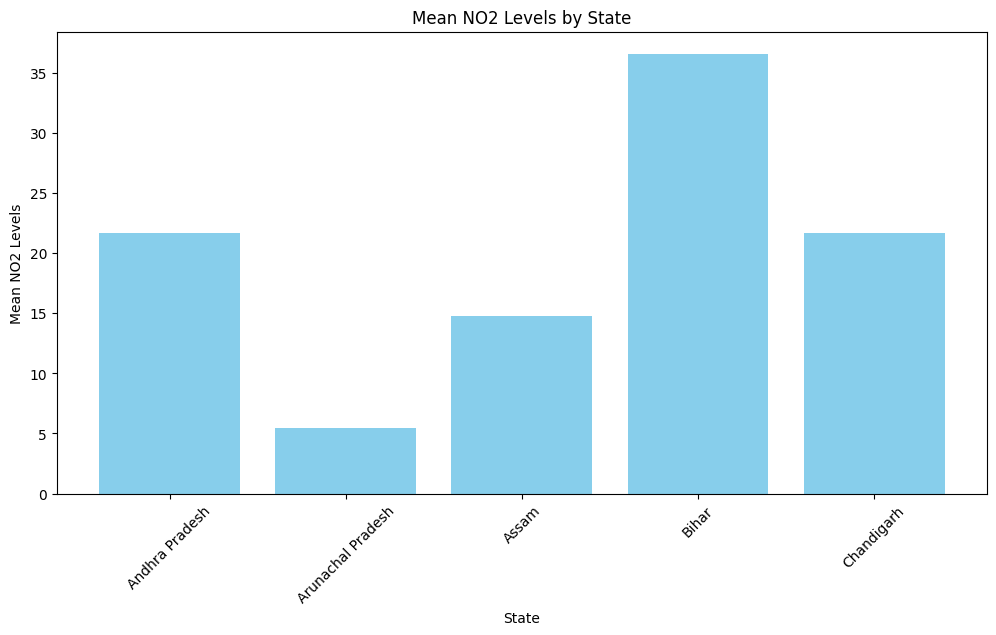

In [ ]:
state_means = df.groupby('state')['no2'].mean()
x_axis = state_means.index
y_axis = state_means.values
plt.figure(figsize=(12,6))
plt.bar(x_axis, y_axis, color='skyblue')
plt.xlabel('State')
plt.ylabel('Mean NO2 Levels')
plt.title('Mean NO2 Levels by State')
plt.xticks(rotation=45)
plt.show()

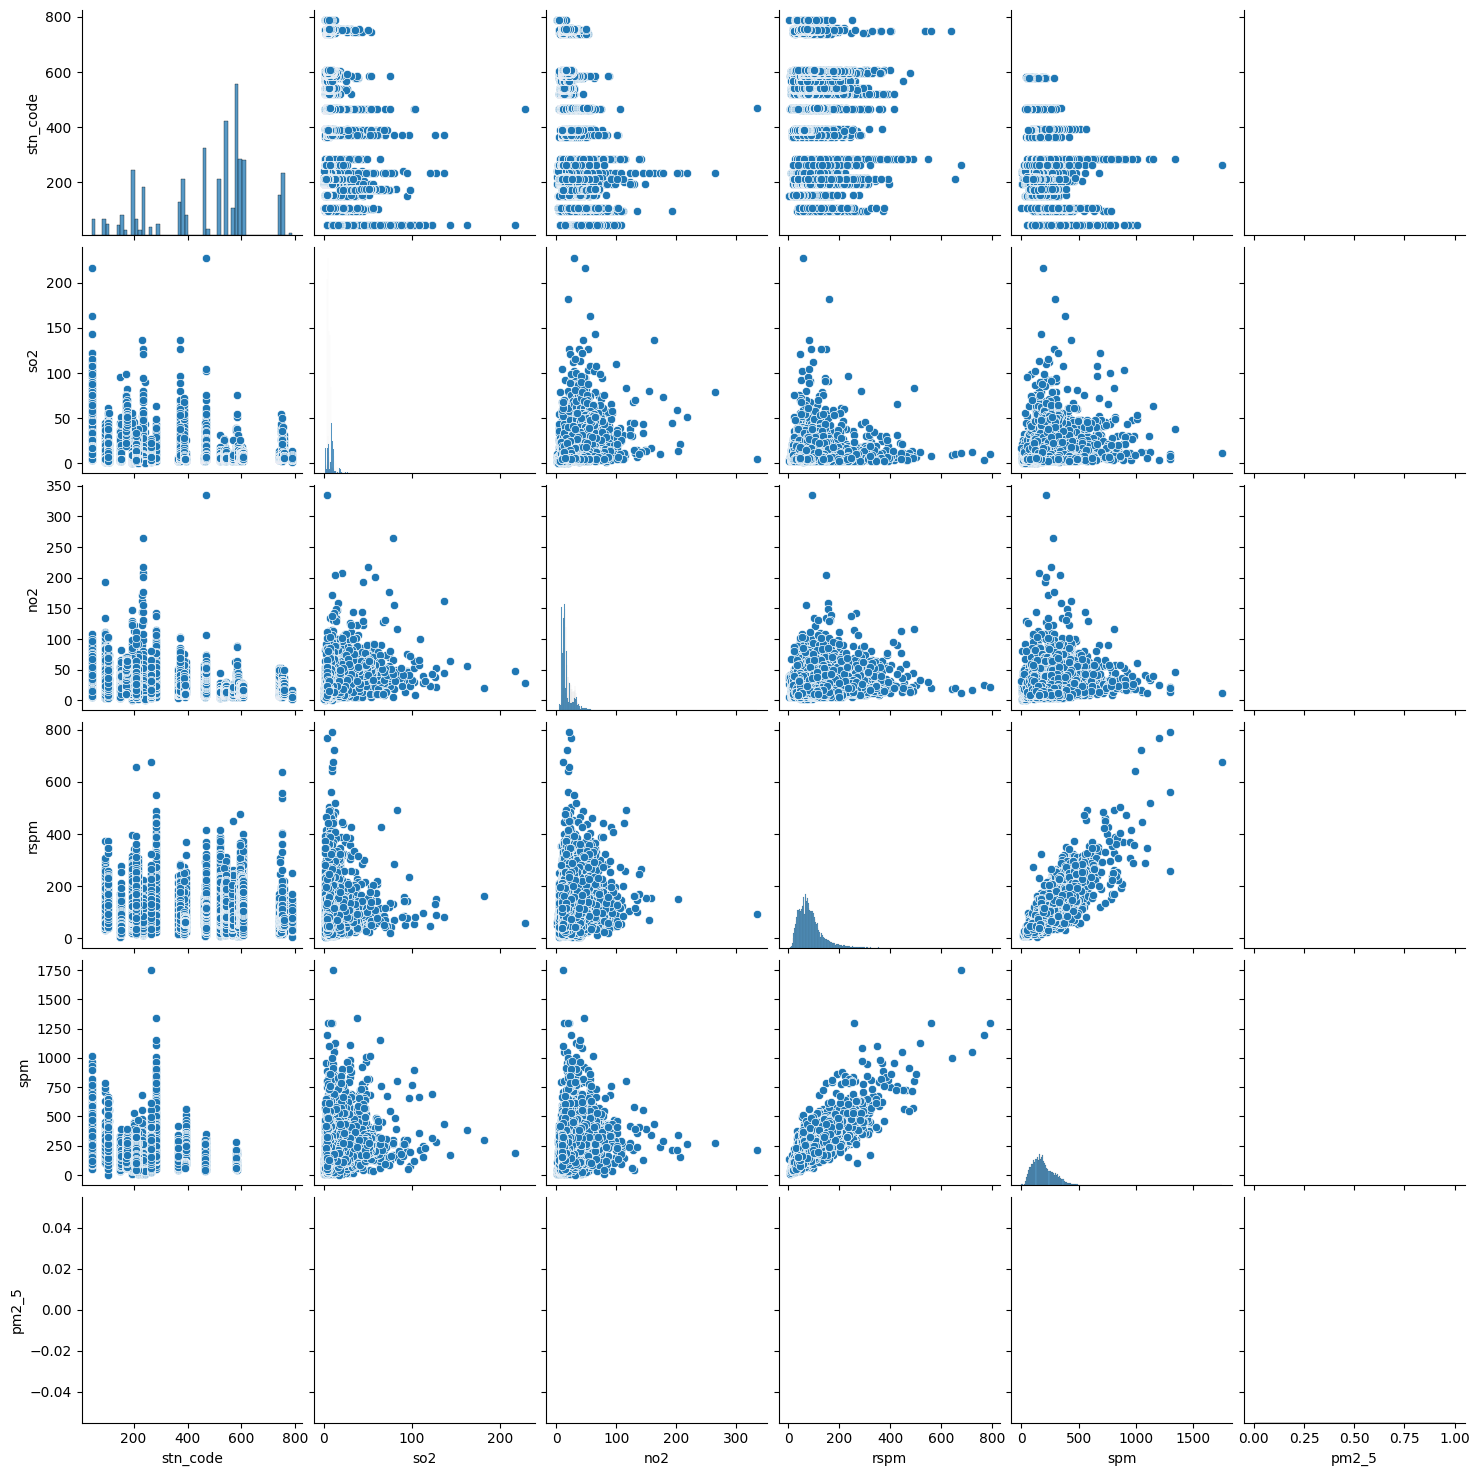

In [ ]:
sns.pairplot(df)

<Axes: >

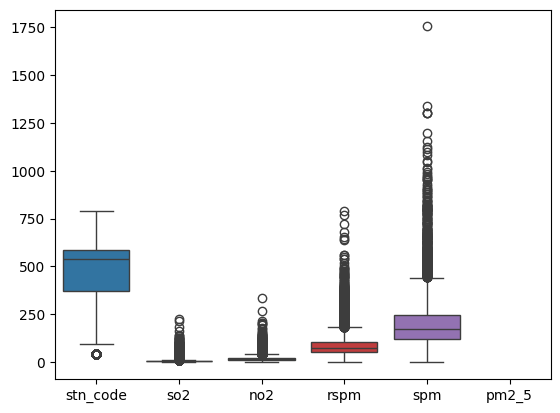

In [ ]:
sns.boxplot(df)

In [ ]:
upper_limit = df['spm'].mean() + 3*df['spm'].std()
lower_limit = df['spm'].mean() - 3*df['spm'].std()

<Axes: ylabel='spm'>

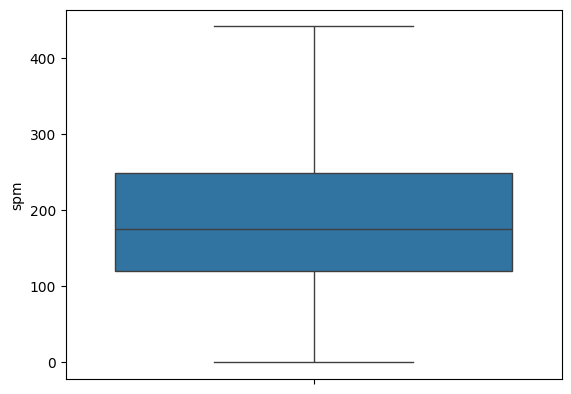

In [ ]:
sns.boxplot(df['spm'], showfliers=False)

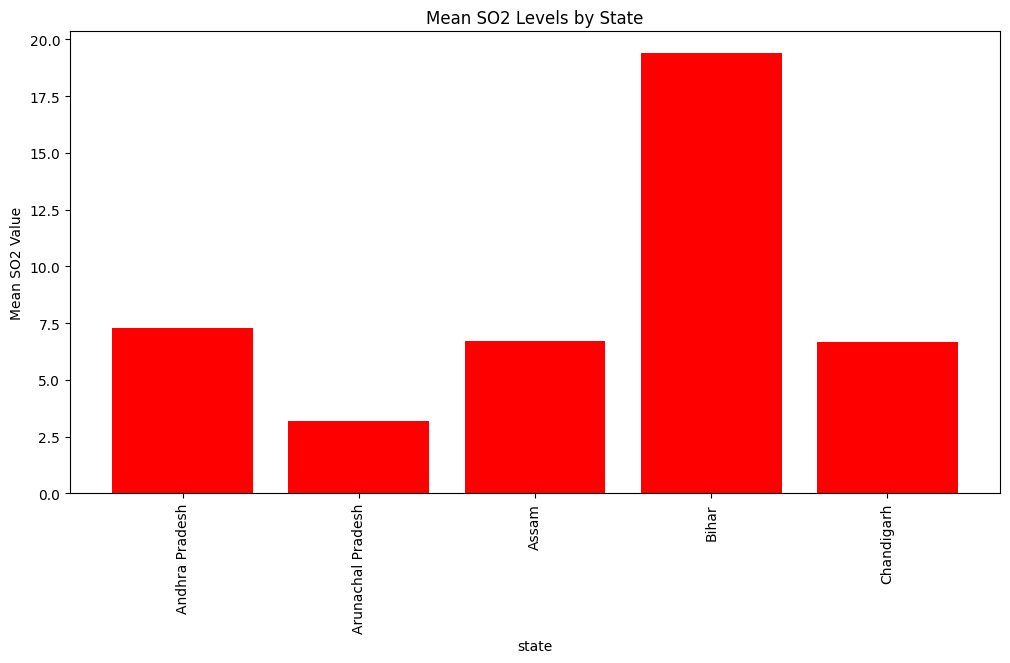

In [ ]:
state_means = df.groupby('state')['so2'].mean()
x_axis = state_means.index
y_axis = state_means.values
plt.figure(figsize=(12,6))
plt.bar(x_axis, y_axis, color='Red')
plt.xlabel('state')
plt.ylabel('Mean SO2 Value')
plt.title('Mean SO2 Levels by State')
plt.xticks(rotation=90)
plt.show()